In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartdiseases/heart.csv


In [41]:

import pandas as pd
df = pd.read_csv('/kaggle/input/heartdiseases/heart.csv')
df.columns = df.columns.str.lower()

print("Successfully loaded!")
display(df.head())

Successfully loaded!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [42]:
# Check for missing values and data types
print("--- Info & Missing Values ---")
df.info()

--- Info & Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [43]:
# Statistical Summary (Mean, min, max)

pd.set_option("display.float_format", "{:.3f}".format)

print("\n--- Statistical Summary ---")
display(df.describe())



--- Statistical Summary ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


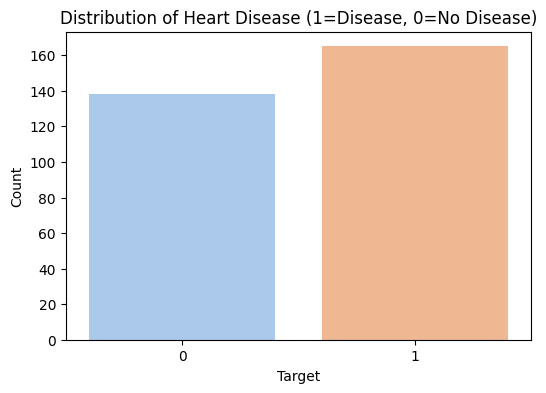

In [44]:
# Visualization 1: Target Distribution (Is the data balanced?)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='pastel')
plt.title('Distribution of Heart Disease (1=Disease, 0=No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

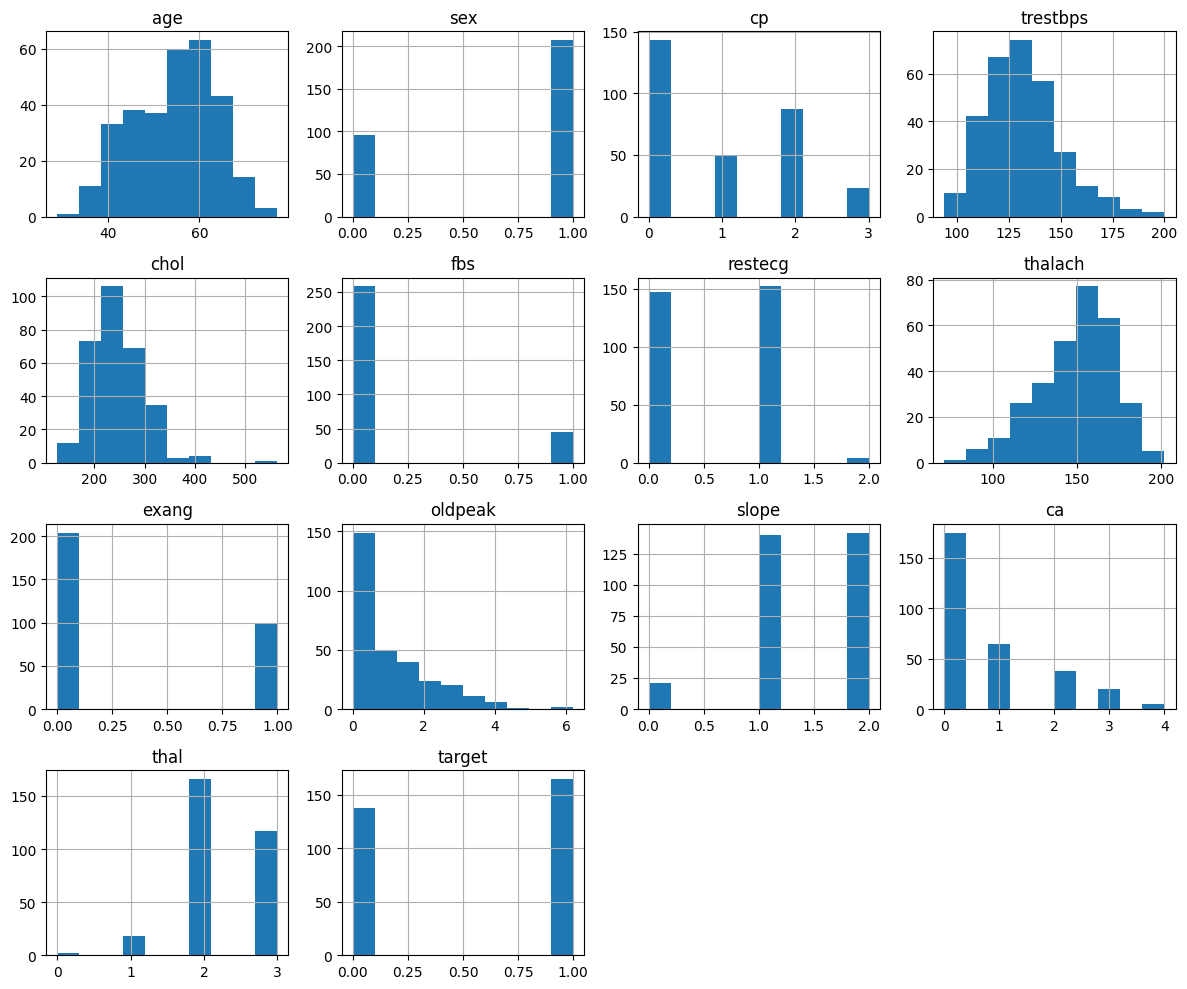

In [45]:
# Visualization 2: Histogram for each
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

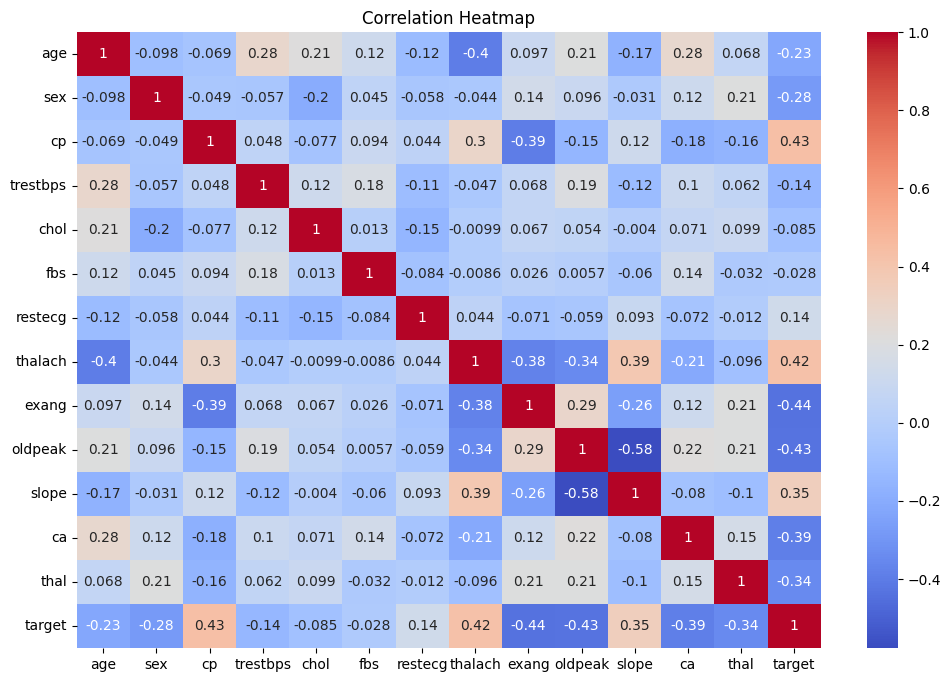

In [46]:
# Visualization 3: Correlation Heatmap (What relates to what?)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


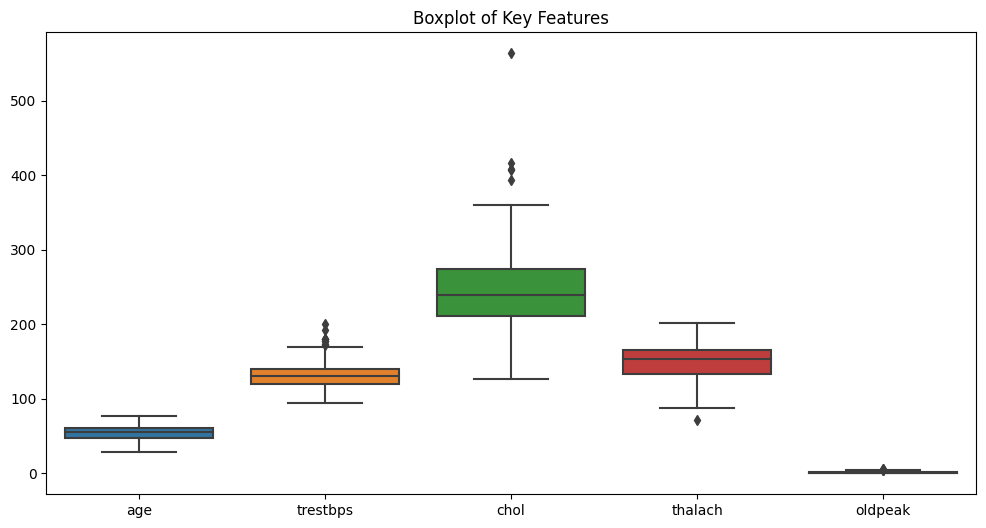

In [47]:
# Visualization 4: Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title("Boxplot of Key Features")
plt.show()


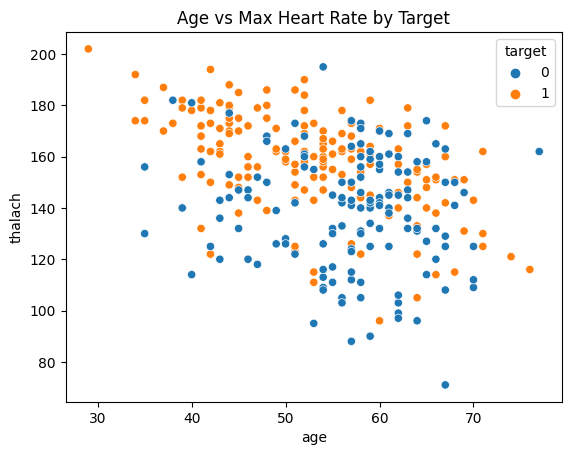

In [48]:
# Visualization 5: Scatter plots by target (1/0)
sns.scatterplot(data=df, x='age', y='thalach', hue='target')
plt.title("Age vs Max Heart Rate by Target")
plt.show()

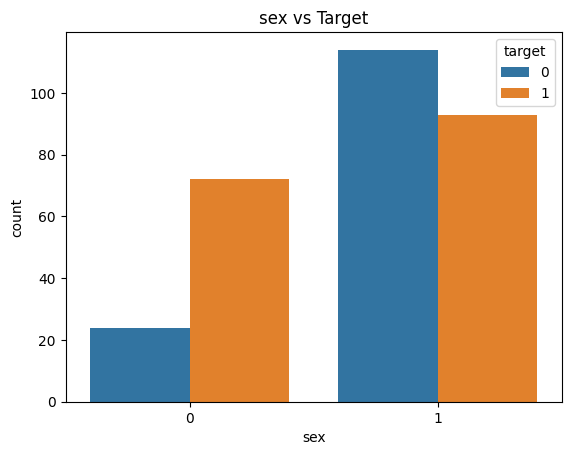

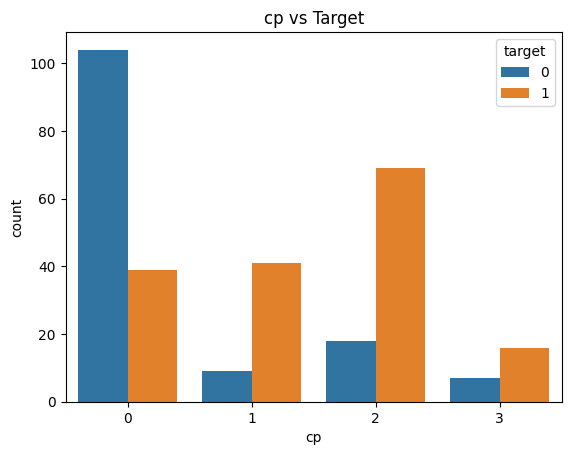

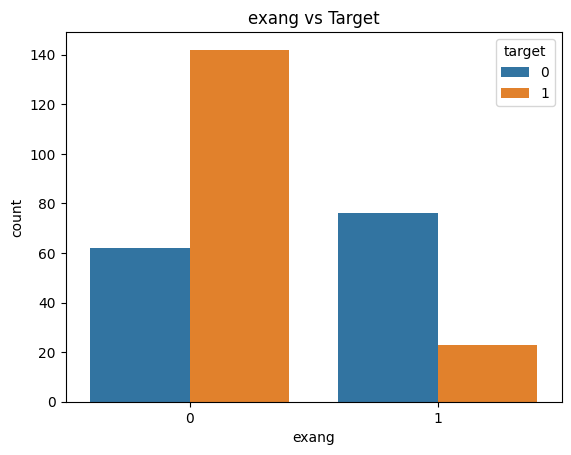

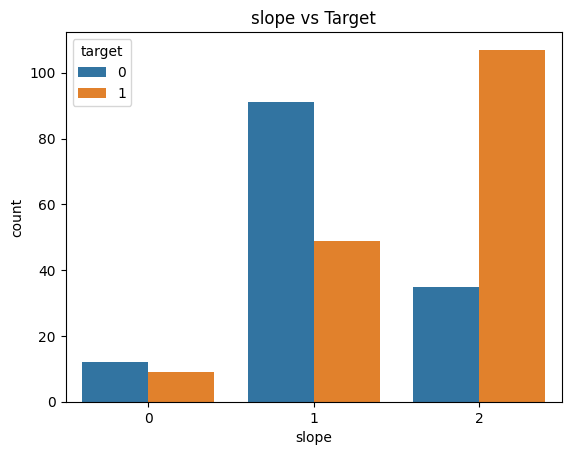

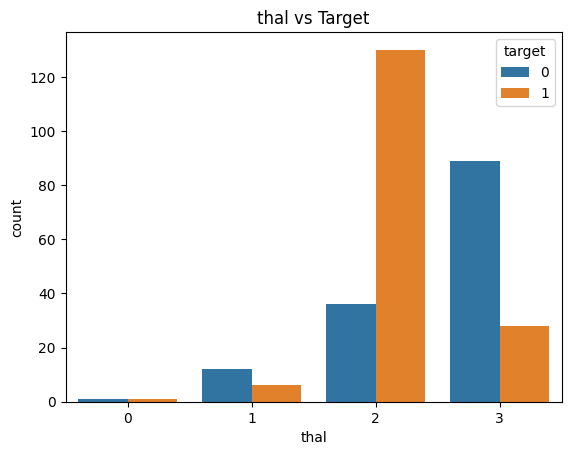

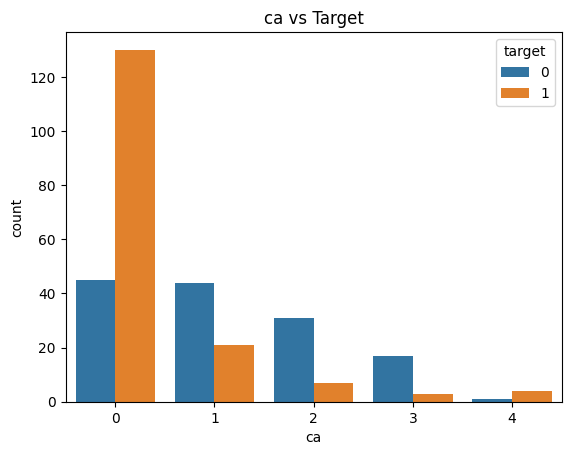

In [49]:
categorical = ['sex', 'cp', 'exang', 'slope', 'thal', 'ca']
for col in categorical:
    sns.countplot(x=df[col], hue=df['target'])
    plt.title(f"{col} vs Target")
    plt.show()

In [50]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [55]:
import numpy as np

coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coef


,Feature,Coefficient
2,cp,0.818
10,slope,0.436
7,thalach,0.395
6,restecg,0.284
5,fbs,0.090
0,age,-0.085
4,chol,-0.175
3,trestbps,-0.273
8,exang,-0.517
12,thal,-0.566


In [56]:
# 2. Define which columns are Numerical vs Categorical
# We do this so we know which ones to Scale and which to Encode
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# 3. Build the Preprocessing Pipeline
# StandardScaler -> For numbers (Age 60 vs Chol 200)
# OneHotEncoder -> For categories (Chest Pain Type 1, 2, 3...)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

In [63]:
# 4. Split the data (Train 80% / Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Apply transformations
# Fit on TRAIN only, then Transform both
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Preprocessing Complete.")
print(f"Training Data Shape: {X_train_processed.shape}")
print(f"Test Data Shape: {X_test_processed.shape}")

Preprocessing Complete.
Training Data Shape: (242, 22)
Test Data Shape: (61, 22)


In [64]:
# 2. Make Predictions
y_pred = log_reg.predict(X_test_processed)
y_prob = log_reg.predict_proba(X_test_processed)[:, 1] # Probabilities for ROC-AUC

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
# 3. Evaluation Metrics
print("--- Model Performance Metrics ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob):.4f}")

print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred))

--- Model Performance Metrics ---
Accuracy:  0.9016
Precision: 0.9333
Recall:    0.8750
F1 Score:  0.9032
ROC-AUC:   0.9418

--- Detailed Classification Report ---
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



***Accuracy at 90% for f1-score***: out of 10 people, the machine correctly diagnoses the disease for 9 people. With this medical dataset that I downloaded from kaggle, this number is actually impressive.

***ROC-AUC ~0.94***: This is the most important index to evaluate whether the model is "smart" or not. The maximum score is 1.0. A score of 0.94 means that the model distinguishes between sick and healthy people very clearly.

***Precision (0.93) > Recall (0.88)***:

* **High Precision (0.93)**: When the machine says "This man is sick", it is 93% correct. Very few false alarms.

* **Fair Recall (0.88)**: The machine detects 88% of people who are actually sick. About 12% are left out. In real medical practice, people often want Recall to be even higher so as not to miss patients, but 0.88 is a very safe score for the exercise.

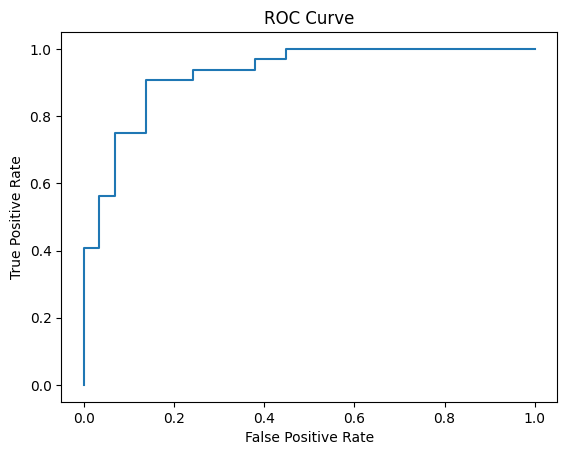

0.9267241379310345

In [68]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = auc(fpr, tpr)
auc_score


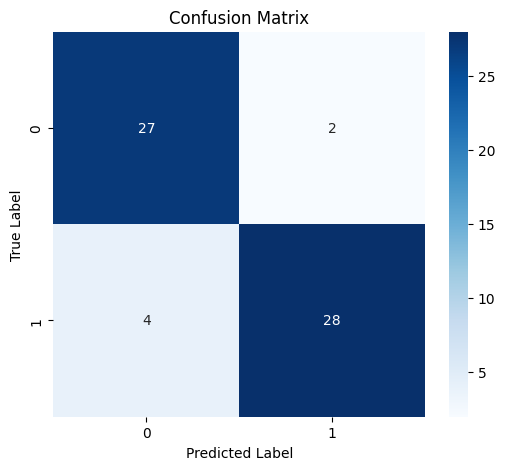

In [66]:
# 4. Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

*****This matrix:*****
**Top left corner (27) - True Negative:** There are 27 healthy people and the machine CORRECTLY guessed that they are healthy --> Very good.

**Bottom right corner (28) - True Positive:** There are 28 people with heart disease and the machine CORRECTLY guessed that they are sick --> Very good.

**Top right corner (2) - False Positive:** There are 2 people who are actually healthy, but the machine mistakenly guessed that they are sick. Patients will be worry, then spend more money to go to the doctor, but it isn't necessary.

**Bottom left corner (4) - False Negative:** There are 4 people who are actually suffering from heart disease, but the machine says they are healthy. This is the most dangerous index in medicine. These 4 people can go home and be in danger because they do not get treatment.

**Task 3 (EDA Summary)**
* During analyzing the dataset, I found that the target variable is [balanced/imbalanced]. 
* The dataset contains no missing values since I have removed them.
* The correlation matrix revealed that features like cp (chest pain) and thalach (max heart rate) have a strong positive correlation with heart disease, while exang (exercise induced angina) has a negative correlation. 

**Task 5 (Model Evaluation)**

* The Logistic Regression model performed exceptionally well on the test set with an Accuracy of 90%. The ROC-AUC score of 0.94 suggests the model is highly effective at distinguishing between patients with and without heart disease.

* While the Precision (93%) is very high, the Recall (88%) is slightly lower. In a medical context, we might want to tune the model to increase Recall (even if Precision drops slightly) because missing a sick patient (False Negative) is more dangerous than misdiagnosing a healthy one. However, for a baseline model, these results are robust.